<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
خوشه‌بندی رفتار مشتریان</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
فرض کنید شما تحلیل‌گر داده یک فروشگاه آنلاین هستید. دیتاستی در اختیار دارید که اطلاعات مربوط به سفارشات مشتریان را در آن ثبت کرده‌اید. با استفاده از روش‌های خوشه‌بندی، مشتریان را بر اساس رفتار خریدشان خوشه‌بندی کنید.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در فایل اولیه‌ی این سوال یک فایل با نام <code>orders.csv</code> قرار دارد.
    مجموعه‌داده‌ی این سوال شامل ۲۰۰٬۰۰۰ سطر و ۷ ستون است و
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| ستون | توضیح |
|:------:|:-------:|
| `ID_Order` | شناسه یکتای هر سفارش است. هر ردیف جدول نماینده یک سفارش خاص است. |
| `ID_Customer` | شناسه یکتای مشتری است که سفارش را ثبت کرده است. ممکن است یک مشتری چند سفارش داشته باشد. |
| `ID_Item` | شناسه یکتای آیتم یا محصول سفارش‌داده‌شده. در واقع مشخص می‌کند چه محصولی در سفارش آمده است. |
| `DateTime_CartFinalize` | زمان نهایی‌سازی سبد خرید است، یعنی لحظه‌ای که سفارش نهایی شده. این ستون برای استخراج اطلاعات زمانی (مثلاً فصل خرید، ساعت روز، روز هفته) می‌تواند کاربردی باشد. |
| `Amount_Gross_Order` | مبلغ ناخالص سفارش به تومان یا هر واحد پولی دیگر. شامل کل هزینه سفارش (شاید بدون تخفیف یا مالیات). |
| `city_name_fa` | نام فارسی شهری که سفارش از آن ثبت شده. |
| `Quantity_item` | تعداد آیتم سفارش‌داده‌شده از آن محصول در سفارش. |

</font>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:500%; font-family:vazir; font-size:medium">
<font color="red" size=3><b color='red'>توجه:</b></font>
<font face="vazirmatn" size=3>
در این سوال هیچ مجموعه داده‌ای برای تست وجود ندارد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در ابتدا نیاز است فایل مجموعه‌داده را بخوانید. تنها مجموعه داده تمرین، در فایل <code>orders.csv</code> ذخیره شده‌است.
</font>
</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/Quera/4_Clustering/orders.csv'

# بارگذاری داده‌ها
df = pd.read_csv(data_path)
print("shape of dataset: ", df.shape)
print(df.head(7))

shape of dataset:  (200000, 7)
   ID_Order  ID_Customer  ID_Item    DateTime_CartFinalize  \
0   2714054       469662    21386  2015-10-15 08:50:56.000   
1  11104039      3063877   248497  2018-02-11 00:29:26.000   
2   4228130      3184893    50144  2016-06-14 00:30:08.000   
3  22225624      6888562    70208  2018-09-03 14:37:19.000   
4   4068771      2533490    67627  2016-05-21 11:51:02.000   
5  11479246      2841640   312932  2018-03-01 12:07:15.000   
6   8267421      5235886    42365  2017-08-19 13:30:24.000   

   Amount_Gross_Order city_name_fa  Quantity_item  
0            597982.0   محمود آباد            1.0  
1            980000.0       خرمدره            1.0  
2            229358.0         قرچک            1.0  
3             16514.0           قم            1.0  
4            133028.0        تهران            1.0  
5            290000.0         مشهد            1.0  
6             55046.0       اصفهان            1.0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [4]:
df.describe()

,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,9.871963e+06,2.860671e+06,3.757313e+05,1.458204e+06,1.261225
std,6.404275e+06,1.921815e+06,3.948462e+05,5.450972e+06,1.801186
min,1.000411e+06,4.661320e+05,7.600000e+01,0.000000e+00,1.000000
25%,5.022253e+06,1.021053e+06,8.955725e+04,1.212730e+05,1.000000
50%,8.591270e+06,2.895180e+06,2.302210e+05,3.211010e+05,1.000000
75%,1.246037e+07,4.179218e+06,5.192668e+05,1.011032e+06,1.000000
max,2.484656e+07,7.282118e+06,2.093722e+06,1.530000e+09,500.000000


In [5]:
df.isna().sum()

,0
ID_Order,0
ID_Customer,0
ID_Item,0
DateTime_CartFinalize,0
Amount_Gross_Order,0
city_name_fa,0
Quantity_item,0


In [6]:
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])

# =============================
# 📦 سفارش‌ها (orders_df)
# =============================
orders_df = df.drop_duplicates(subset='ID_Order').copy()

orders_df['Order_Hour'] = orders_df['DateTime_CartFinalize'].dt.hour
orders_df['Order_DayOfWeek'] = orders_df['DateTime_CartFinalize'].dt.dayofweek
orders_df['Order_Month'] = orders_df['DateTime_CartFinalize'].dt.month
orders_df['Order_Week'] = df['DateTime_CartFinalize'].dt.isocalendar().week
orders_df['Order_Season'] = orders_df['Order_Month'] % 12 // 3 + 1

# افزودن City_ID به سفارش‌ها
location_df = df.groupby('city_name_fa').agg({
    'ID_Order': pd.Series.nunique,
    'ID_Customer': pd.Series.nunique,
    'Amount_Gross_Order': 'sum'
}).reset_index().rename(columns={
    'ID_Order': 'Total_Orders',
    'ID_Customer': 'Unique_Customers',
    'Amount_Gross_Order': 'Total_Revenue'
})
location_df['City_ID'] = location_df.index
location_df['Avg_Revenue_per_Order'] = location_df['Total_Revenue'] / location_df['Total_Orders']
location_df['Avg_Revenue_per_Customer'] = location_df['Total_Revenue'] / location_df['Unique_Customers']

orders_df = orders_df.merge(location_df[['city_name_fa', 'City_ID']], on='city_name_fa', how='left')

# =============================
# 🧾 آیتم‌های سفارش (order_items_df)
# =============================
df['Total_Item_Price'] = df['Amount_Gross_Order'] * df['Quantity_item']
df['Unit_Price'] = df['Total_Item_Price'] / df['Quantity_item']

order_items_df = df[['ID_Order', 'ID_Item', 'Quantity_item', 'Total_Item_Price', 'Unit_Price']].copy()

# محاسبه تعداد آیتم‌ها و مجموع تعداد برای هر سفارش
item_summary = df.groupby('ID_Order').agg(
    Num_Items_in_Order=('ID_Item', 'nunique'),
    Total_Quantity_in_Order=('Quantity_item', 'sum')
).reset_index()

orders_df = orders_df.merge(item_summary, on='ID_Order', how='left')

# =============================
# 👤 مشتری‌ها (customer_df)
# =============================
snapshot_date = df['DateTime_CartFinalize'].max()

customer_full_df = df.groupby('ID_Customer').agg({
    'ID_Order': pd.Series.nunique,
    'Amount_Gross_Order': 'sum',
    'DateTime_CartFinalize': ['max', 'min']
})

customer_full_df.columns = ['Frequency', 'Monetary', 'Last_Order_Date', 'First_Order_Date']
customer_full_df = customer_full_df.reset_index()

customer_full_df['Recency'] = (snapshot_date - customer_full_df['Last_Order_Date']).dt.days
customer_full_df['Customer_Lifetime'] = (
    customer_full_df['Last_Order_Date'] - customer_full_df['First_Order_Date']
).dt.days
customer_full_df['Avg_Order_Amount'] = customer_full_df['Monetary'] / customer_full_df['Frequency']

customer_df = customer_full_df[[
    'ID_Customer', 'Recency', 'Frequency', 'Monetary',
    'Avg_Order_Amount', 'Customer_Lifetime'
]]

In [7]:
customer_df.head()

,ID_Customer,Recency,Frequency,Monetary,Avg_Order_Amount,Customer_Lifetime
0,466132,8,10,35356058.0,3.535606e+06,1797
1,466136,444,1,306963.0,3.069630e+05,0
2,466141,637,3,1324312.0,4.414373e+05,358
3,466146,1023,1,302752.0,3.027520e+05,0
4,466152,98,3,1173027.0,3.910090e+05,1154


In [8]:
order_items_df.head()

,ID_Order,ID_Item,Quantity_item,Total_Item_Price,Unit_Price
0,2714054,21386,1.0,597982.0,597982.0
1,11104039,248497,1.0,980000.0,980000.0
2,4228130,50144,1.0,229358.0,229358.0
3,22225624,70208,1.0,16514.0,16514.0
4,4068771,67627,1.0,133028.0,133028.0


In [9]:
orders_df.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Order_Hour,Order_DayOfWeek,Order_Month,Order_Week,Order_Season,City_ID,Num_Items_in_Order,Total_Quantity_in_Order
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,8,3,10,42,4,638,1,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,0,6,2,6,1,262,1,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,0,1,6,24,3,582,1,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,14,0,9,36,4,593,1,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,11,5,5,20,2,215,1,1.0


In [10]:
location_df.head()

,city_name_fa,Total_Orders,Unique_Customers,Total_Revenue,City_ID,Avg_Revenue_per_Order,Avg_Revenue_per_Customer
0,آب بر,15,14,20903542.0,0,1.393569e+06,1.493110e+06
1,آبادان,401,320,557917848.0,1,1.391316e+06,1.743493e+06
2,آباده,71,48,253235453.0,2,3.566697e+06,5.275739e+06
3,آباده طشک,3,3,39179359.0,3,1.305979e+07,1.305979e+07
4,آبدان,2,2,7838532.0,4,3.919266e+06,3.919266e+06


In [11]:
print("location_df: ", location_df.shape)
print("orders_df: ", orders_df.shape)
print("order_items_df: ", order_items_df.shape)
print("customer_df: ", customer_df.shape)

location_df:  (906, 7)
orders_df:  (197631, 15)
order_items_df:  (200000, 5)
customer_df:  (151634, 6)


In [15]:
print("orders_df dtypes:\n", orders_df.dtypes, "\n\n")
print("order_items_df dtypes:\n", order_items_df.dtypes, "\n\n")
print("customer_df dtypes:\n", customer_df.dtypes, "\n\n")
print("location_df dtypes:\n", location_df.dtypes)


orders_df dtypes:
 ID_Order                            int64
ID_Customer                         int64
ID_Item                             int64
DateTime_CartFinalize      datetime64[ns]
Amount_Gross_Order                float64
city_name_fa                       object
Quantity_item                     float64
Order_Hour                          int32
Order_DayOfWeek                     int32
Order_Month                         int32
Order_Week                         UInt32
Order_Season                        int32
City_ID                             int64
Num_Items_in_Order                  int64
Total_Quantity_in_Order           float64
dtype: object 


order_items_df dtypes:
 ID_Order              int64
ID_Item               int64
Quantity_item       float64
Total_Item_Price    float64
Unit_Price          float64
dtype: object 


customer_df dtypes:
 ID_Customer            int64
Recency                int64
Frequency              int64
Monetary             float64
Avg_Order_Amount

In [16]:
print("orders_df nulls:\n", orders_df.isnull().sum(), "\n\n")
print("order_items_df nulls:\n", order_items_df.isnull().sum(), "\n\n")
print("customer_df nulls:\n", customer_df.isnull().sum(), "\n\n")
print("location_df nulls:\n", location_df.isnull().sum(), "\n\n")

orders_df nulls:
 ID_Order                   0
ID_Customer                0
ID_Item                    0
DateTime_CartFinalize      0
Amount_Gross_Order         0
city_name_fa               0
Quantity_item              0
Order_Hour                 0
Order_DayOfWeek            0
Order_Month                0
Order_Week                 0
Order_Season               0
City_ID                    0
Num_Items_in_Order         0
Total_Quantity_in_Order    0
dtype: int64 


order_items_df nulls:
 ID_Order            0
ID_Item             0
Quantity_item       0
Total_Item_Price    0
Unit_Price          0
dtype: int64 


customer_df nulls:
 ID_Customer          0
Recency              0
Frequency            0
Monetary             0
Avg_Order_Amount     0
Customer_Lifetime    0
dtype: int64 


location_df nulls:
 city_name_fa                0
Total_Orders                0
Unique_Customers            0
Total_Revenue               0
City_ID                     0
Avg_Revenue_per_Order       0
Avg_Reve

In [18]:
print("Unique customers:", df['ID_Customer'].nunique(), "\n")
print("Unique orders:", df['ID_Order'].nunique(), "\n")
print("Unique items:", df['ID_Item'].nunique(), "\n")

Unique customers: 151634 

Unique orders: 197631 

Unique items: 95232 



In [97]:
order_counts

,Customer_Frequency
Order_Count,
1,124098
2,18372
3,5199
4,1995
5,861
6,458
7,239
8,143
9,89



Customers with more than 1 order:
count        30.000000
mean       5054.466667
std       22745.569445
min           1.000000
25%           1.000000
50%           6.500000
75%         129.500000
max      124098.000000
Name: Customer_Frequency, dtype: float64


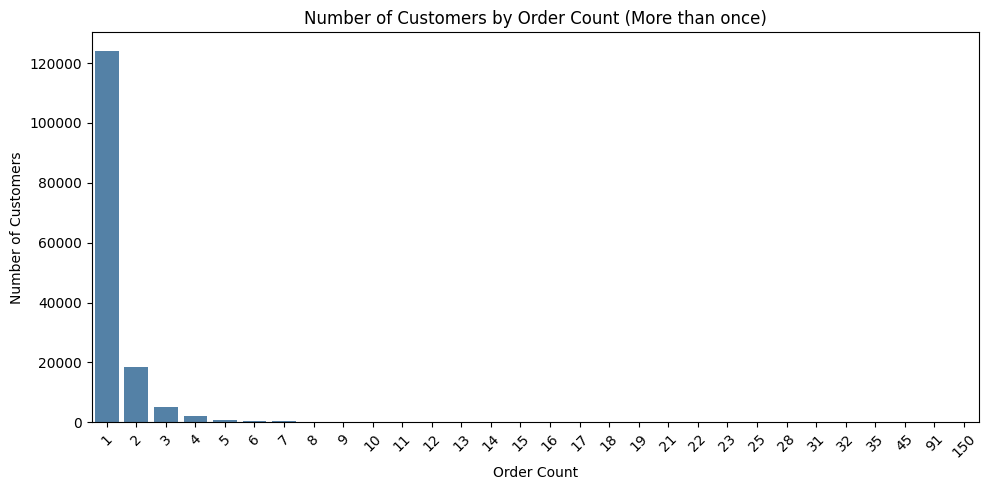

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

order_counts_series = df.groupby('ID_Customer')['ID_Order'].nunique()
order_counts = order_counts_series.value_counts().sort_index().to_frame(name='Customer_Frequency')
order_counts.index.name = 'Order_Count'

print("\nCustomers with more than 1 order:")
print(order_counts['Customer_Frequency'].describe())

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=order_counts.reset_index(),
    x='Order_Count',
    y='Customer_Frequency',
    color='steelblue'
)
plt.title("Number of Customers by Order Count (More than once)")
plt.xlabel("Order Count")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pie Chart — Single vs Multi-order Customers


In [102]:
multi_order_count = (order_counts_series > 1).sum()
total_customers = order_counts_series.shape[0]

print(f"📌 تعداد مشتری‌هایی که بیش از یک بار خرید کرده‌اند: {multi_order_count}")
print(f"📊 درصد نسبت به کل مشتری‌ها: {100 * multi_order_count / total_customers:.2f}%")

📌 تعداد مشتری‌هایی که بیش از یک بار خرید کرده‌اند: 27536
📊 درصد نسبت به کل مشتری‌ها: 18.16%


Text(0.5, 1.0, 'Customer Distribution: Single vs Multiple Orders')

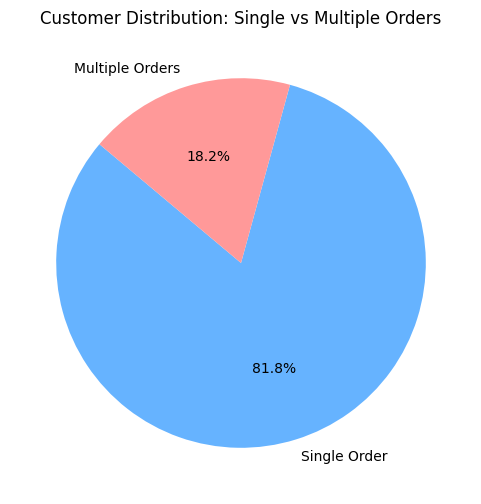

In [104]:
single_count = (order_counts_series == 1).sum()
multi_count = (order_counts_series > 1).sum()

plt.figure(figsize=(6, 6))
plt.pie([single_count, multi_count],
        labels=['Single Order', 'Multiple Orders'],
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'],
        startangle=140)
plt.title("Customer Distribution: Single vs Multiple Orders")


<h2 align=right style="line-height:200%;font-family:vazir;color:#ff1111">
<font face="vazirmatn" color="#ff1111">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که می‌دانید، استفاده کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium; color:#ff1111">
<font face="vazirmatn" size=4 color:"#ff1111">
    <b>بر خلاف سوالات قبلی، مراحل پیش‌پردازش و مهندسی ویژگی در این سوال تاثیر مستقیم بر نمره نهایی شما خواهند گذاشت!</b>
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در سلول پایین کلاسی به اسم <code>Preprocessor</code> تعریف شده‌است که از شما انتظار می‌رود با توجه به نکات زیر، این کلاس را تکمیل کنید.
</font>
</p>


<ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    <li>وظیفه این کلاس، اعمال هرگونه عملیات پیش‌پردازشی و مهندس ویژگی است که قصد دارید روی <code>df</code> اعمال کنید.</li>
    <li>کلاس <code>Preprocessor</code> یک تابع به اسم <code>transform</code> دارد که در خروجی باید <code>self.df</code> را قرار دهد.</li>
    <li>علاوه بر توابع سازنده و <code>transform</code> شما می‌توانید هر تعداد تابع دیگر با هر اسم دلخواهی به کلاس اضافه کنید. اما وجود تابع سازنده و <code>transform</code> الزامی است. به عبارت بهتر این کلاس، حداقل دارای دو تابع است.</li>
    <li>برای پیاده‌سازی این کلاس تنها مجاز به استفاده از کتابخانه‌های <code>numpy</code>, <code>pandas</code> و <code>scikit-lean</code> هستید. هر تابعی که برای پیاده‌سازی این کلاس نیاز دارید (به شرط اینکه درون این سه کتابخانه وجود داشته باشند) را در ابتدای سلول وارد کنید (<code>import</code>). در غیر این صورت اگر از تابع خاصی استفاده کرده باشید ولی آن تابع به اول سلول اضافه نشده‌باشد، حین داوری هیچ امتیازی به شما تعلق نخواهد گرفت!</li>
    <li>برای اینکه کلاس <code>Preprocessor</code> درون فایلی به اسم <code>preprocessor.py</code> ذخیره شود، ولی همچنان درون همین نوت‌بوک هم بتوانید از آن استفاده کنید، لازم است کل محتوای سلولی که کلاس <code>Preprocessor</code> در آن قرار دارد را در یک سلول دیگر کپی کنید و ابتدای سلول دوم، تابع جادویی <code>%%writefile preprocessor.py</code> را قرار دهید و سلول را اجرا کنید.</li>
<li>البته می‌توانید به جای کپی کردن محتوی یک سلول در سلول دیگر و استفاده از تابع جادویی، خودتان یک فایل به اسم <code>preprocessor.py</code> بسازید و محتوای سلول را درون آن کپی کنید!</li>
</font>
</ul>


<p dir=rtl style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium; color:#ff1111">
<font face="vazirmatn" size=4 color:"#ff1111">
    <b>برای توضیحات بیشتر و مشاهده مثال از کلاس <code>Preprocessor</code> به همراه دو سلولی که می‌بایست بنویسیم، به ادامه توجه فرمایید👇</b>
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    تصور کنید قصد داشتیم کلاسی بنویسیم که صرفا مقادیر گمشده را مقداردهی کند. ابتدا تابعی به اسم <code>handle_missing_values</code> می‌نویسیم و کدهای مورد نیاز برای مدیریت مقادیر گمشده را درون آن وارد می‌کنیم.
    <br>
    چون قصد داریم از کتابخانه <code>numpy</code> استفاده کنیم، در ابتدای سلول، قبل از نوشتن کلاس آن را وارد میکنیم. توجه داشته باشید که اهمیتی ندارد کتابخانه یا تابعی که در این کلاس استفاده می‌شود را اول نوت‌بوک وارد کرده‌اید یا خیر. <b>هر کتابخانه یا تابعی که برای اجرا موفقیت‌آمیز این کلاس لازم است را در ابتدا سلول وارد کنید؛ خواه قبلا وارد شده باشد، خواه وارد نشده باشد!</b>
    <br>
    سپس از همه کدهایی که درون سلول زیر نوشته‌ایم، کپی گرفته و در سلول دیگری <i>paste</i> می‌کنیم و در اولین خط سلول، تابع جادویی <code>%%writefile preprocessor.py</code> را می‌نویسیم. سپس با اجرای سلول جدید، همه محتوایات آن درون فایل <code>preprocessor.py</code> ذخیره می‌شود.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    <b>توضیحات بالا و تابعی که در کلاس <code>Preprocessor</code> ایجاد کردیم، همگی مثال بودند و هیچ الزامی وجود ندارد که شما هم دقیقا همین تابع را در کلاس خود داشته باشید. پس با استفاده از خلاقیت و فکر، کلاسی توسعه دهید که به بهترین شکل داده را مهندسی می‌کند!</b>
</font>
</p>



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

class Preprocessor:
    def __init__(self, df):
        self.df = df.copy()

    def transform(self):
        self.handle_missing_values()
        self._convert_datetime()
        self._log_transform()
        self._clip_quantity()
        self._extract_time_features()
        customer_df = self.aggregate_by_customer()
        scaled_df = self.scale_features(customer_df)
        return scaled_df

    def handle_missing_values(self):
        self.df.dropna(subset=[
            'ID_Customer', 'Amount_Gross_Order',
            'Quantity_item', 'DateTime_CartFinalize'
        ], inplace=True)

    def _convert_datetime(self):
        self.df['DateTime_CartFinalize'] = pd.to_datetime(self.df['DateTime_CartFinalize'], errors='coerce')

    def _log_transform(self):
        self.df['Amount_Gross_Order'] = np.log1p(self.df['Amount_Gross_Order'])

    def _clip_quantity(self, max_quantity=20):
        self.df['Quantity_item'] = np.clip(self.df['Quantity_item'], a_min=0, a_max=max_quantity)

    def _extract_time_features(self):
        self.df['hour'] = self.df['DateTime_CartFinalize'].dt.hour
        self.df['dayofweek'] = self.df['DateTime_CartFinalize'].dt.dayofweek
        self.df['month'] = self.df['DateTime_CartFinalize'].dt.month
        self.df['season'] = self.df['month'] % 12 // 3  # فصل: 0 بهار، 1 تابستان، 2 پاییز، 3 زمستان

    def aggregate_by_customer(self):
        customer_group = self.df.groupby('ID_Customer').agg({
            'ID_Order': 'nunique',
            'Amount_Gross_Order': ['sum', 'mean', 'std'],
            'Quantity_item': 'sum',
            'ID_Item': 'nunique',
            'city_name_fa': 'nunique',
            'hour': 'mean',
            'dayofweek': 'mean',
            'season': 'mean'
        })
        customer_group.columns = ['_'.join(col).strip() for col in customer_group.columns.values]
        customer_group.reset_index(inplace=True)
        return customer_group

    def scale_features(self, df):
        scaler = StandardScaler()
        numeric_cols = df.select_dtypes(include=np.number).columns.drop('ID_Customer')
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        return df

In [ ]:
%%writefile preprocessor.py

import numpy as np

class Preprocessor :
    def __init__ (self, df):
        self.df = df.copy()

    def handle_missing_values (self) :
        self.df.fillna(0, inplace=True)

    def transform (self) :
        self.handle_missing_values()
        return self.df

In [ ]:
preprocessor = Preprocessor(df)
X = preprocessor.transform()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
انتخاب تعداد خوشه‌ها و آموزش مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که ابتدا براساس روش‌هایی که می‌دانید تعداد خوشه‌های مناسب برای این سوال را پیدا کنید و سپس بر اساس آن مدلی آموزش دهید که بتواند دسته‌بندی هر مشتری را مشخص کند. <br>راهنمایی: برای انتخاب تعداد خوشه‌ها اگر از معبار <code>silhouette score</code> استفاده کنید، برای هر <code>k</code> حداقل به ۳ الی ۴ دقیقه زمان نیاز خواهید داشت!
</font>
</p>

In [ ]:
# انتخاب تعداد خوشه‌ها



# خوشه‌بندی نهایی
model = None


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#ff1111">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    پس از مهندسی ویژگی و مدل‌سازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای هر نمونه، به خوشه آن برساند.
    <br>
    از این مدل برای پیش‌بینی خوشه نمونه‌های موجود در داده <b><i>orders.csv</i></b> استفاده کنید و نتایج را در قالب جدول زیر آماده کنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Cluster|خوشه منتصب به هر نمونه|
    
</font>
</div>
</center>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>Cluster</i> است و ۲۰۰٬۰۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در فایل <i>orders.csv</i> شما باید یک مقدار پیشبینی شده داشته باشید.
</font>
</p>



<p dir=rtl style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium; color:#ff1111">
<font face="vazirmatn" size=4 color:"#ff1111">
    در این تمرین، مجموعه داده‌هایی جداگانه برای آزمون یا آموزش نداریم و شما باید خروجی مدل خود را برای همان مجموعه داده‌ای که در اول تمرین، از فایل بارگذاری کردید، در دیتافریم <code>submission</code> ذخیره کنید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>Cluster</i> ممکن است متفاوت باشد.
</font>
</p>


<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    
||Cluster|
|:----:|:-----:|
|0|1|
|1|1|
|2|0|
|3|1|
|4|0|

</font>
</div>



In [ ]:
submission = pd.DataFrame(customer_df['Cluster'])
submission.to_csv('submission.csv', index=False)
submission

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>silhouette score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
</font>
</p>

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score using existing data and cluster labels
sil_score = silhouette_score(Preprocessor(pd.read_csv('orders.csv')).transform(),pd.read_csv('submission.csv').Cluster)
print(f'Silhouette Score: {sil_score:.3f}')


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazirmatn" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>85</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    اگر همه چیز را درست و طبق خواسته سوال پیاده‌سازی کرده باشید، با اجرای سلول زیر، با تقریب ۰/۰۱، همان عددی را مشاهده خواهید کرد که کوئرا در صورت آپلود جواب به شما نشان می‌دهد.
    </font>
</p>

In [ ]:
print( 100 * (sil_score + 1 ) / 2 )

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)
file_names = ['Clustering.ipynb', 'submission.csv', 'model', 'preprocessor.py']
compress(file_names)